In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pprint import pprint
from wordcloud import WordCloud


warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 700)


TRAIN_DATA_PATH = "data/train.csv"
TEST_DATA_PATH = "data/test.csv"


/home/stanislav/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Visualization utils




In [2]:


def plot_missing_values(df, title="Missing Values in Data", colormap="magma"):
    missing_percentage = df.isnull().mean() * 100
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_percentage.values, y=missing_percentage.index, palette=colormap)
    
    plt.xlabel('Missing Values % ', fontsize=14)
    plt.ylabel('Column', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(np.linspace(0, 50, 10 + 1))
    
    for i, percentage in enumerate(missing_percentage.values):
        plt.text(percentage + 0.5, i, f'{percentage:.2f}%', fontsize=12, va='center')
    
    plt.show()
    
    
def plot_column_counts(df, column_name, title, display_k=10, colormap="viridis", figsize=(12, 8)):
    '''
    Function to display bar plots of counts of a column in a DataFrame
    
    Inputs:
        df: DataFrame
            The DataFrame containing the data
        column_name: str
            Name of the column to plot
        display_k: int, default=10
            Number of top values to plot
    '''
    column_counts = df[column_name].value_counts()[:display_k]
    
    # Plot the bar plot using Seaborn
    plt.figure(figsize=figsize)
    sns.barplot(x=column_counts.values, y=column_counts.index, palette=colormap,)
    
    plt.xlabel('Counts', fontsize=16)
    plt.ylabel(column_name, fontsize=13)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=16)
    
    plt.show()
    

def generate_wordcloud(df, column_name, title, colormap="magma"):
    '''
    Function to generate and display a word cloud for a column in a DataFrame
    
    Inputs:
        df: DataFrame
            The DataFrame containing the data
        column_name: str
            Name of the column to generate word cloud from
    '''
    # Concatenate all words in the column
    text = ' '.join(df[column_name].dropna().astype(str))
    
    # Generate word cloud
    wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap=colormap).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(13, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axis
    plt.title(title, fontsize=16)
    plt.show()
    
    
def plot_binary_target_distribution(df, target_column):
    '''
    Function to plot the distribution of a binary target variable using Seaborn
    
    Inputs:
        df: DataFrame
            The DataFrame containing the data
        target_column: str
            Name of the binary target column
    '''
    # Plot the distribution of the binary target variable using Seaborn
    plt.figure(figsize=(10, 7))
    ax = sns.countplot(data=df, x=target_column, palette='magma')
    plt.title(f'Distribution of {target_column}', fontsize=16)
    plt.xlabel('Target Variable', fontsize=14)
    plt.yticks(np.linspace(0, 10000, 10 + 1))
    plt.ylabel('Count', fontsize=14)
    
    # Add percentage labels on top of each bar
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height / total:.1%}', ha='center', fontsize=15)
    
    plt.show()

In [3]:
train_df = pd.read_csv(TRAIN_DATA_PATH)
test_df = pd.read_csv(TEST_DATA_PATH)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [6]:
train_df.head(3)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1


In [7]:
test_df.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


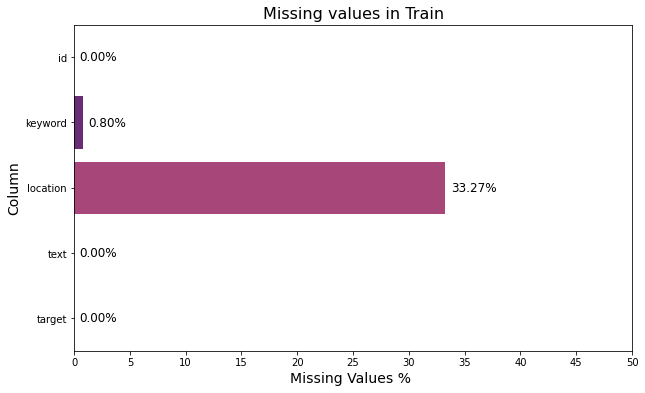

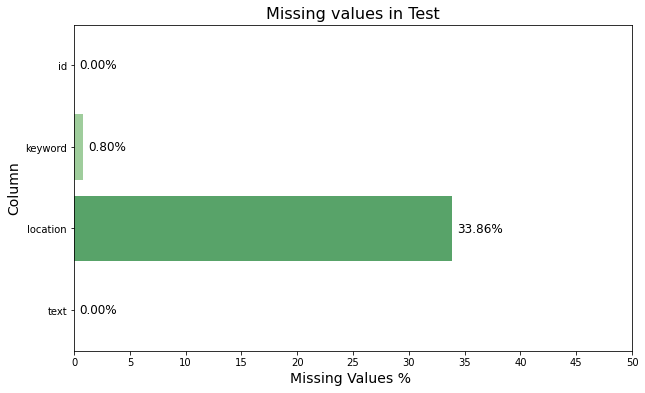

In [8]:
plot_missing_values(train_df, "Missing values in Train")
plot_missing_values(test_df, "Missing values in Test", colormap="Greens")

### Target Analysis



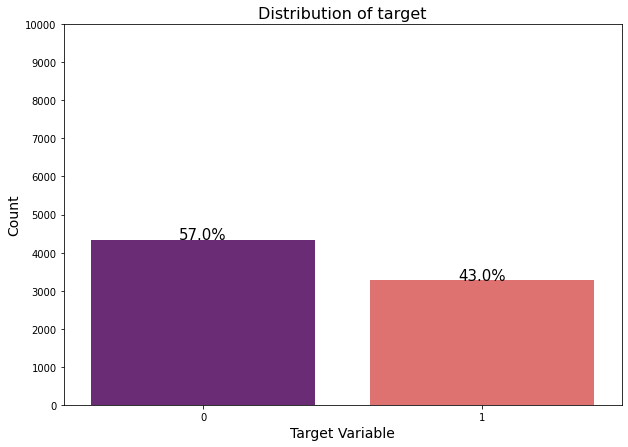

In [9]:
plot_binary_target_distribution(train_df, "target")

### Location analysis

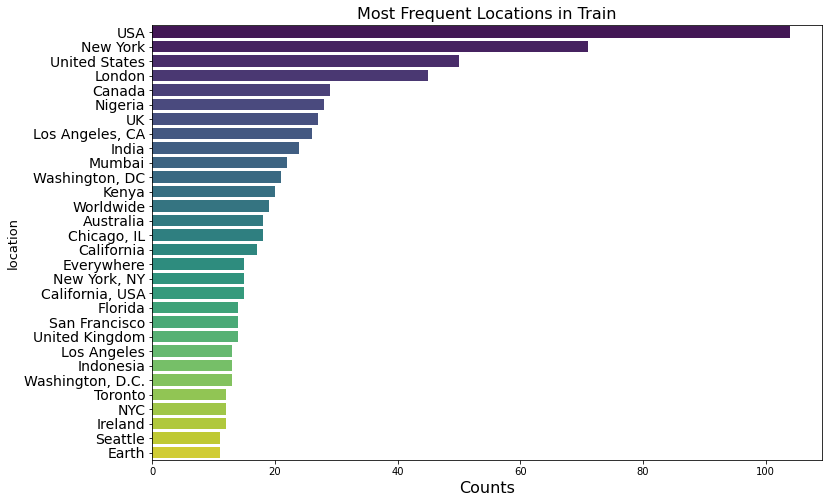

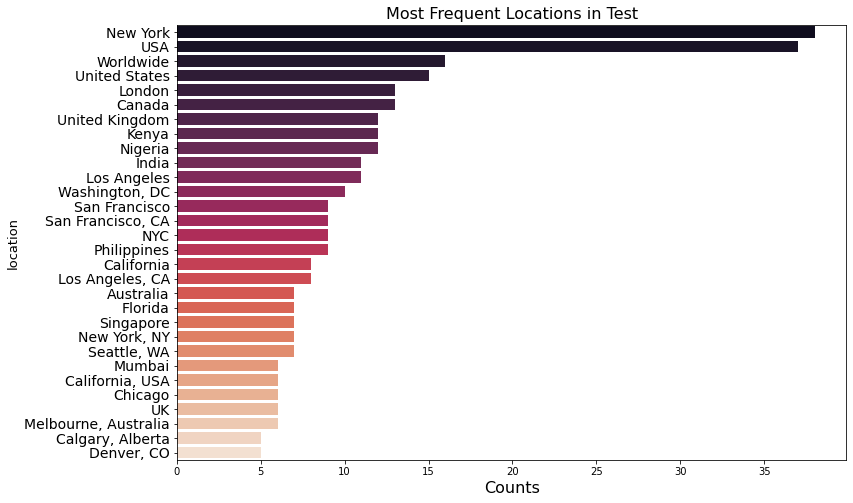

In [10]:
plot_column_counts(train_df, column_name="location",
                   title="Most Frequent Locations in Train",
                   display_k=30,
                   colormap="viridis")


plot_column_counts(test_df, column_name="location",
                   title="Most Frequent Locations in Test",
                   display_k=30,
                   colormap="rocket")


In [11]:
train_df["location"].value_counts()[-20:]

Paulton, England                  1
Johannesburg                      1
Alvin, TX                         1
Wilbraham, MA                     1
Jerseyville, IL                   1
The Citadel, Oldtown, Westeros    1
Trackside California              1
he/him or she/her (ask)           1
Some pum pum                      1
SEA Server                        1
Waco, Texas                       1
todaysbigstock.com                1
buenos aires argentina            1
everydaynigerian@gmail.com        1
Surulere Lagos,Home Of Swagg      1
MontrÌ©al, QuÌ©bec                1
Montreal                          1
ÌÏT: 6.4682,3.18287               1
Live4Heed??                       1
Lincoln                           1
Name: location, dtype: int64

In [12]:
test_df["location"].value_counts()[-20:]

Raleigh                           1
norton                            1
Dunedin, New Zealand              1
@ArgentinaLiars ?| willbradley    1
Virginia                          1
festac,Lagos,Nigeria              1
At Grandmother Willow's           1
|Elsmere| Wilmington, DE.         1
Curitiba-PR                       1
globetrotter                      1
Roanoke, VA                       1
Between Manchester and Lille.     1
Phoenix, AZ                       1
Subconscious LA                   1
#Global                           1
Medford, NJ                       1
Quezon City                       1
LanÌ¼s                            1
USA,Washington,Seattle            1
Brussels, Belgium                 1
Name: location, dtype: int64

    Observations:
        1) Location columns has about 33% values missing which is quite high rate of NAN's values
        
        2) Values are not in the same granularity level. We have cities, countries, country + city pairs and different tags. This means, that this columns is hard to parse, encode and process as we don't have a clear 
        interpretation what location means. It could be anything from country to email (as you can see above).
        
        3) Least common locations are weird and not interpretable. We can see emails, incorrect spelling and just some garbage in values
        
Overall, I would say, that I will drop this feature for now since it seems to be unpromissing because of quality and consistency of values in location column.
     

### Keyword analysis

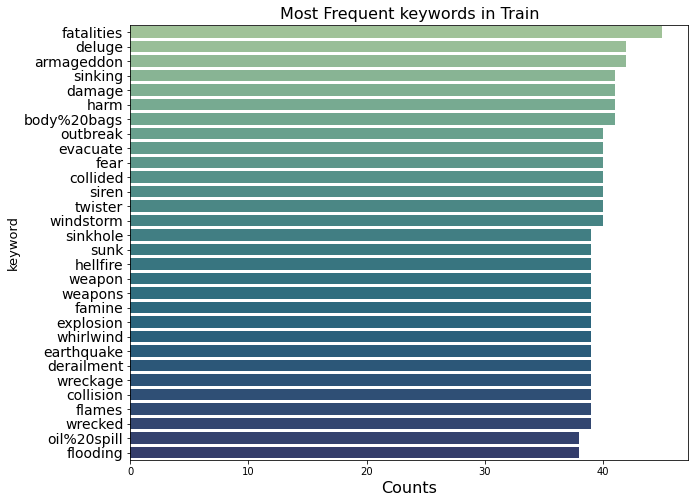

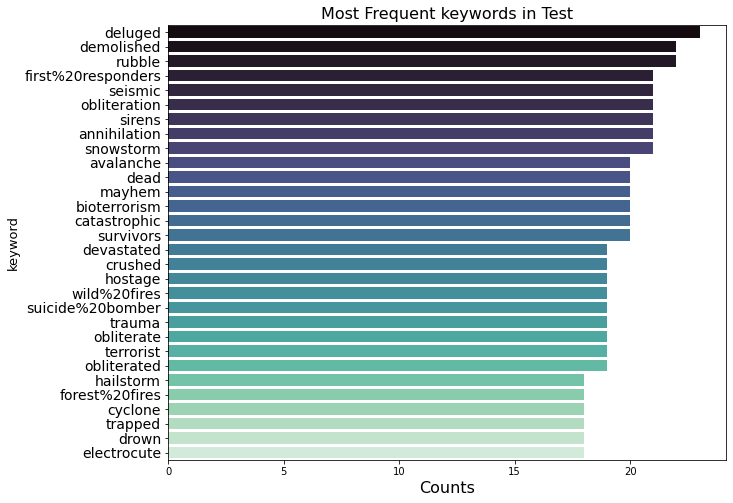

In [13]:
plot_column_counts(train_df, column_name="keyword",
                   title="Most Frequent keywords in Train",
                   display_k=30,
                   colormap="crest",
                   figsize=(10, 8))


plot_column_counts(test_df, column_name="keyword",
                   title="Most Frequent keywords in Test",
                   display_k=30,
                   colormap="mako",
                   figsize=(10, 8))

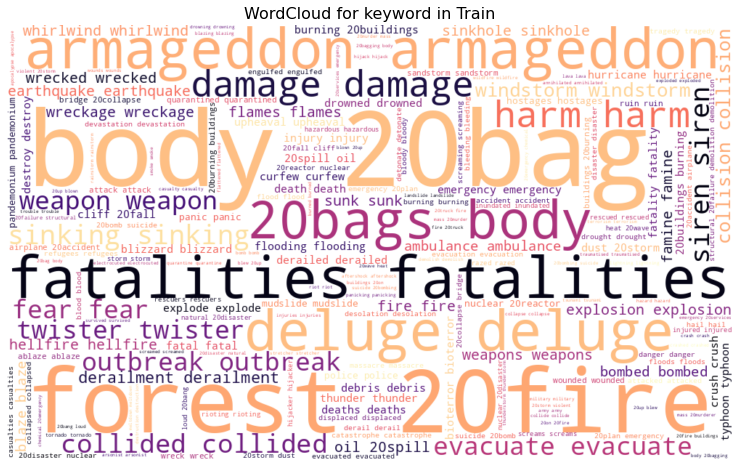

In [14]:
generate_wordcloud(train_df, "keyword",
                   title="WordCloud for keyword in Train")

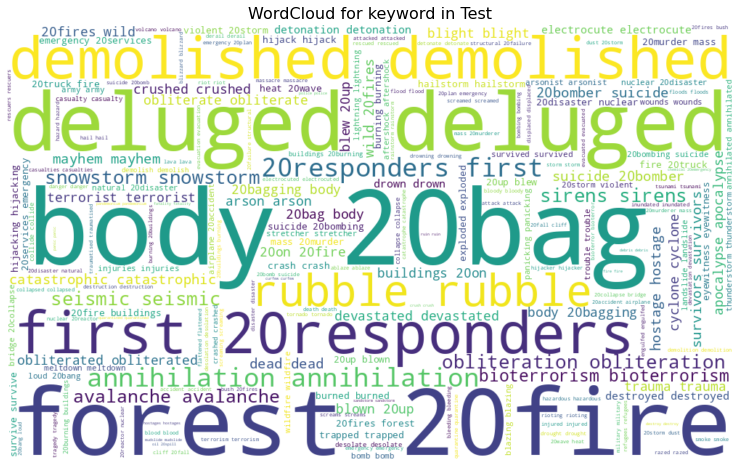

In [15]:
generate_wordcloud(test_df, "keyword", 
                   title="WordCloud for keyword in Test",
                   colormap="viridis")

### Tweets Text Overview

In [16]:
print("Examples of tweets in Train:\n\n")

for i in range(10):
    print("Tweet #", i + 1, train_df.iloc[i]["text"], "\n")

print("\n\nExamples of tweets in Test:\n\n")

for i in range(10):
    print("Tweet #", i + 1, test_df.iloc[i]["text"], "\n")

Examples of tweets in Train:


Tweet # 1 Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all 

Tweet # 2 Forest fire near La Ronge Sask. Canada 

Tweet # 3 All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 

Tweet # 4 13,000 people receive #wildfires evacuation orders in California  

Tweet # 5 Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  

Tweet # 6 #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires 

Tweet # 7 #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas 

Tweet # 8 I'm on top of the hill and I can see a fire in the woods... 

Tweet # 9 There's an emergency evacuation happening now in the building across the street 

Tweet # 10 I'm afraid that the tornado is coming to our area... 



Examples of tweets in Test:


Tweet # 1 Just hap

### Text Cleaning Utils

medium article - https://gauravtanwar1.medium.com/nlp-a-comprehensive-guide-to-text-cleaning-and-preprocessing-63f364febfc5

In [24]:
#%%writefile text_cleaning_utils.py

import re
import string
import nltk
from nltk.corpus import stopwords


def remove_url(text):
 return re.sub(r'https?:\S*', '', text)

def remove_mentions_and_tags(text):
    text = re.sub(r'@\S*', '', text)
    return re.sub(r'#\S*', '', text)


def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)


def remove_numbers(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

def remove_punctuation(text):
    return ''.join([c for c in text if c not in string.punctuation])

def remove_stopwords(text):
    stop_words = set(stopwords.words('english')).union(list("qwertyiopasdfghjklzxcvbnm"))
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])



def clean_text(text):

    lowered_text = text.lower()
    removed_tags_text = remove_mentions_and_tags(lowered_text)
    removed_urls_text = remove_url(removed_tags_text)
    removed_spec_chars_text = remove_special_characters(removed_urls_text)
    removed_numbers_text = remove_numbers(removed_spec_chars_text)

    cleaned_text = remove_stopwords(remove_punctuation(removed_numbers_text).strip())

    return cleaned_text
    



### Apply Cleaning to data

In [25]:

train_df["text_cleaned"] = train_df["text"].apply(clean_text)
test_df["text_cleaned"] = test_df["text"].apply(clean_text)

In [26]:
train_df.head()

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deeds reason may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,residents asked shelter place notified officers evacuation shelter place orders expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,people receive evacuation orders california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo ruby smoke pours school


In [27]:
test_df.head()

,id,keyword,location,text,text_cleaned
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone.",heard different cities stay safe everyone
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",forest fire spot pond geese fleeing across street cannot save
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills china taiwan


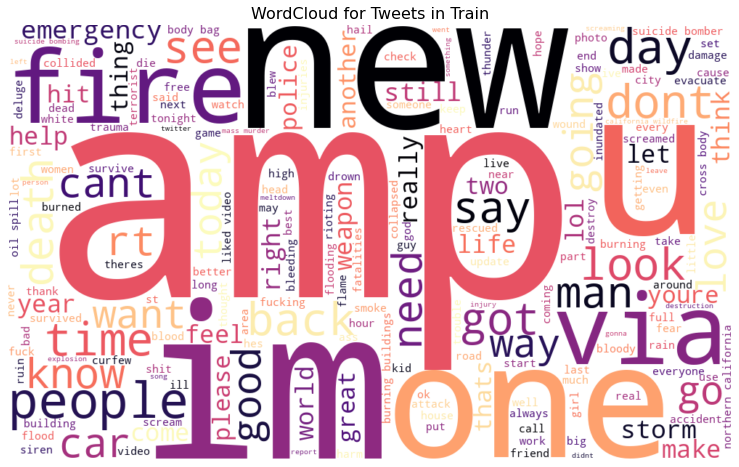

In [28]:
generate_wordcloud(train_df, "text_cleaned", 
                   title="WordCloud for Tweets in Train")

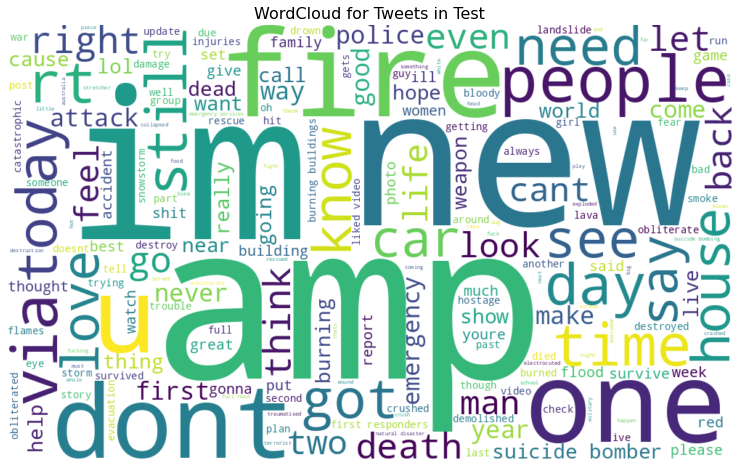

In [29]:
generate_wordcloud(test_df, "text_cleaned", 
                   title="WordCloud for Tweets in Test",
                   colormap="viridis")

### Some comments and conclusions...


### Saving Cleaned Data

In [30]:
cleaned_train_df = train_df[["id", "text_cleaned", "target"]]
cleaned_test_df  = test_df[["id", "text_cleaned"]]

In [31]:
cleaned_train_df.head()

,id,text_cleaned,target
0,1,deeds reason may allah forgive us,1
1,4,forest fire near la ronge sask canada,1
2,5,residents asked shelter place notified officers evacuation shelter place orders expected,1
3,6,people receive evacuation orders california,1
4,7,got sent photo ruby smoke pours school,1


In [32]:
cleaned_test_df.head()

,id,text_cleaned
0,0,happened terrible car crash
1,2,heard different cities stay safe everyone
2,3,forest fire spot pond geese fleeing across street cannot save
3,9,apocalypse lighting
4,11,typhoon soudelor kills china taiwan


In [34]:
cleaned_train_df.to_csv("data/cleaned_train.csv", index=False)
cleaned_test_df.to_csv("data/cleaned_test.csv", index=False)